In [ ]:
# IMPORTS

import os.path

import random
from random import shuffle
import numpy as np
import pandas as pd
random.seed(0)   # Makes sure we have same random initial values
import sklearn
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.preprocessing import OneHotEncoder  

# Model
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

import nltk

nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet
# from nltk.corpus import stopwords
import re
import json
import matplotlib.pyplot as plt

def get_X_Y(filepath):
  with open(filepath, 'r') as f:
    data = f.readlines()
  X,Y = [],[]
  for s in data:
    X.append(s[1:].strip())
    Y.append(s[0])
  return X,Y

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AEDA

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Mounted at /content/drive
/content/drive/MyDrive/AEDA


In [ ]:
# DATA ANALYSIS

# def print_dim(dataset):
#   with open(dataset) as original:
#     x = 0
#     y = 0
#     for line in original:
#       x += 1
#       y = max(y,len(line))
#   print(x,y)

# # %cd /content/drive/MyDrive/AEDA

# # PRINTING THE DIMENSIONS OF EACH DATASET : ORIGINAL FIVE, EDA, AEDA
# print("ORIGINAL \n")
# print("TRAIN \n")
# print_dim("DATASETS/train/cr/train.txt")
# print_dim("DATASETS/train/pc/train.txt")
# print_dim("DATASETS/train/sst2/train.txt")
# print_dim("DATASETS/train/subj/train.txt")
# print_dim("DATASETS/train/trec/train.txt")
# print() 

# print("TEST \n")
# print_dim("DATASETS/test/cr/test.txt")
# print_dim("DATASETS/test/pc/test.txt")
# print_dim("DATASETS/test/sst2/test.txt")
# print_dim("DATASETS/test/subj/test.txt")
# print_dim("DATASETS/test/trec/test.txt")
# print()

# print("EDA \n")
# print_dim("EDA/train/cr/train.txt")
# print_dim("EDA/train/pc/train.txt")
# print_dim("EDA/train/sst2/train.txt")
# print_dim("EDA/train/subj/train.txt")
# print_dim("EDA/train/trec/train.txt")
# print()

# print("AEDA \n")
# print_dim("AEDA/train/cr/train.txt")
# print_dim("AEDA/train/pc/train.txt")
# print_dim("AEDA/train/sst2/train.txt")
# print_dim("AEDA/train/subj/train.txt")
# print_dim("AEDA/train/trec/train.txt")
# print()

# PRINTING EXAMPLES OF AEDA AND EDA
print("EXAMPLES \n")
print("ORIGINAL \n")
path = "DATASETS/train/cr/train.txt"
with open(path, 'r') as f:
  data = f.readlines()
print(data[2],"\n")


print("EDA \n")
path = "EDA/train/cr/train.txt"
with open(path, 'r') as f:
  data = f.readlines()
print(data[10])
print(data[11])
print(data[12])
print(data[13])
print(data[14])

print("AEDA \n")
path = "AEDA/train/cr/train.txt"
with open(path, 'r') as f:
  data = f.readlines()
print(data[10])
print(data[11])
print(data[12])
print(data[13])
print(data[14])


EXAMPLES 

ORIGINAL 

0	i must have heard this about a dozen times over the span of 2 weeks , when t-zones never worked . 
 

EDA 

0	i must have heard this about a birth dozen times over the span of weeks when t zones never worked

0	i must have about this heard a dozen times over the span of weeks when t zones never worked

0	i heard this about a dozen times over the span of weeks when never worked

0	i moldiness have heard this about a dozen times over the span of weeks when t zones never worked

0	i must have heard this about a dozen times over the span of weeks when t zones never worked 

AEDA 

0	i must have ! heard this about a dozen times over the span of 2 weeks ; , ! when t-zones never worked . 

0	i must have ? heard this about . a dozen times ; over ? the span of 2 weeks , when ! t-zones never worked ; . 

0	i must have heard this , about a dozen times , over the span of 2 weeks , when t-zones never worked . 

0	i must have heard this about a dozen times over the span of 2 

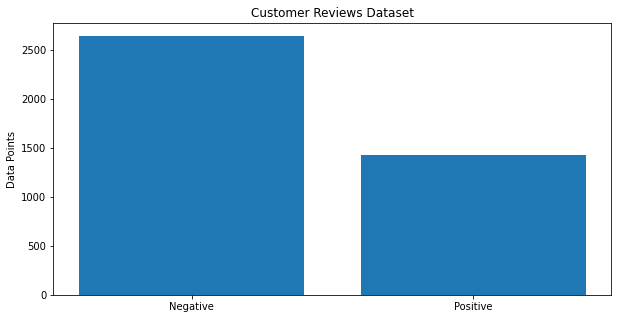

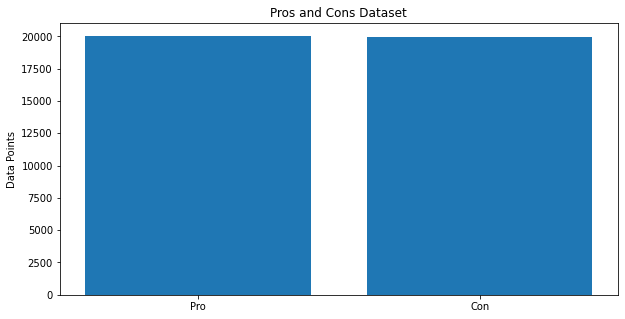

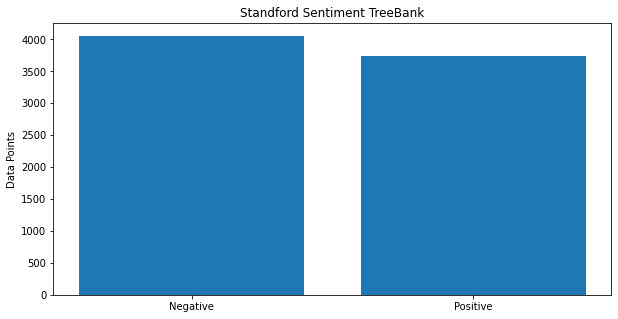

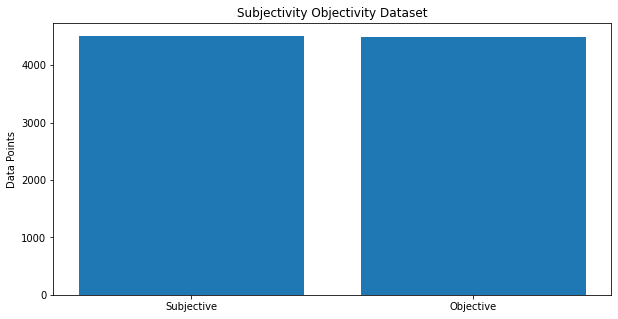

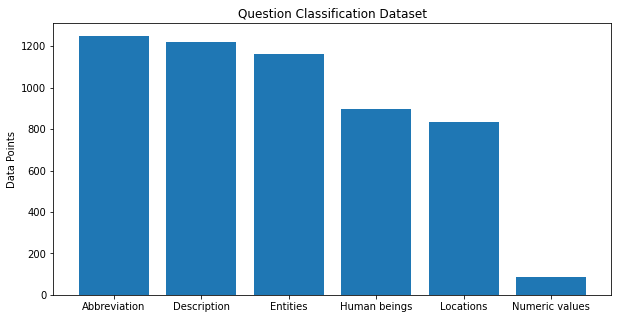

In [ ]:
# PRINTING COUNT OF VALUES OF ALL CLASSES IN EACH DATASET
classes = {'cr' : ['Negative','Positive'],
           'pc' : ['Pro','Con'],
           'sst2' : ['Negative','Positive'],
           'subj' : ['Subjective','Objective'],
           'trec' : ['Abbreviation','Description','Entities','Human beings','Locations','Numeric values']
           }
names = {'cr' : 'Customer Reviews Dataset',
           'pc' : 'Pros and Cons Dataset',
           'sst2' : 'Standford Sentiment TreeBank',
           'subj' : 'Subjectivity Objectivity Dataset',
           'trec' : 'Question Classification Dataset',
         }

for cur_dataset in ['cr','pc','sst2','subj','trec']:
  X,Y = get_X_Y('DATASETS/train/'+cur_dataset +'/train.txt')
  counts = pd.DataFrame(Y).value_counts()
  count = counts.to_numpy()
  plt.figure(figsize = (10,5))
  plt.title(names[cur_dataset])
  plt.ylabel('Data Points')
  l = []
  for i in range(len(count)):
    l.append(i)
  plt.xticks(l,classes[cur_dataset])
  plt.bar(np.arange(len(count)), count)

In [ ]:
# MAKING THE FOLDERS FOR EDA AND AEDA

# %cd /content/drive/MyDrive/AEDA

# os.mkdir('AEDA')
# os.mkdir('AEDA/train')
# os.mkdir('AEDA/train/cr')
# os.mkdir('AEDA/train/pc')
# os.mkdir('AEDA/train/sst2')
# os.mkdir('AEDA/train/subj')
# os.mkdir('AEDA/train/trec')

# os.mkdir('EDA')
# os.mkdir('EDA/train')
# os.mkdir('EDA/train/cr')
# os.mkdir('EDA/train/pc')
# os.mkdir('EDA/train/sst2')
# os.mkdir('EDA/train/subj')
# os.mkdir('EDA/train/trec')

In [ ]:
build_model(400,20,5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 200)           80000     
                                                                 
 conv1d (Conv1D)             (None, 16, 256)           256256    
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 128)           98432     
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 64)            24640     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [ ]:
# BUILD MODEL

def build_model(vocab_size,maxlen,number_of_classes):

  model = Sequential()

  # CNN
  model.add(layers.Embedding(vocab_size, 200 ,input_length = maxlen))
  model.add(layers.Conv1D(256, 5, activation='relu'))
  model.add(layers.Conv1D(128, 3, activation='relu'))
  model.add(layers.Conv1D(64, 3, activation='relu'))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(number_of_classes, activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

  
  print(model.summary())
  return model

def get_accuracy(X_train,Y_train,X_test,Y_test):


  # perform vectorization
  tokenizer = Tokenizer()
  X_train = np.array(X_train)
  X_test = np.array(X_test)
  tokenizer.fit_on_texts(X_train)
  Xcnn_train = np.array(tokenizer.texts_to_sequences(X_train))
  Xcnn_test = np.array(tokenizer.texts_to_sequences(X_test))
  vocab_size = len(tokenizer.word_index) + 1  
  # print(Xcnn_train[0])
  # print(Xcnn_test[0]) 
  # print(vocab_size)

  maxlen = 0
  for j in X_train:
    maxlen = max(maxlen,len(j))
  for j in X_test:
    maxlen = max(maxlen,len(j))
  # print(maxlen)

  Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
  Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
  # print(Xcnn_train.shape,Xcnn_test.shape)

  enc = OneHotEncoder()
  Y_train = np.array(Y_train).reshape(-1,1)
  Y_test = np.array(Y_test).reshape(-1,1)
  enc.fit(Y_train)
  Y_train = enc.transform(Y_train).astype(np.int64).toarray()
  Y_test = enc.transform(Y_test).astype(np.int64).toarray()
  number_of_classes = len(Y_train[0])

  # run on the model
  model = build_model(vocab_size,maxlen,number_of_classes)
  model.fit(x = Xcnn_train,y = Y_train,batch_size = 1024,epochs = 10)
  acc = model.evaluate(Xcnn_test,Y_test)

  # return test accuracy
  return acc

**AEDA Augmentation**

In [ ]:
# # AEDA AUGMENTATION

# PUNCTUATIONS = ['.', ',', '!', '?', ';', ':']
# PUNC_RATIO = 0.3
# def insert_punctuation_marks(sentence, punc_ratio=PUNC_RATIO):
#   words = sentence.split(' ') 
#   new_line = []
#   q = random.randint(1, int(punc_ratio * len(words) + 1))
#   qs = random.sample(range(0, len(words)), q)
#   for j, word in enumerate(words):
#     if j in qs: 
#       new_line.append(PUNCTUATIONS[random.randint(0, len(PUNCTUATIONS)-1)])
#     new_line.append(word)
#   new_line = ' '.join(new_line)
#   return new_line

# def AEDA(source,destination):
#   data_aug = []
#   with open(source) as original:
#     for line in original:
#       line1 = line.split('\t')
#       label = line1[0]
#       sentence = line1[1]
#       for i in range(4):
#         sentence_aug = insert_punctuation_marks(sentence)
#         line_aug = '\t'.join([label, sentence_aug])
#         data_aug.append(line_aug)
#       data_aug.append(line)
#   with open(destination, 'w') as f:
#     f.writelines(data_aug)

In [ ]:
# os.remove("AEDA/train/cr/train.txt")
# os.remove("AEDA/train/pc/train.txt")
# os.remove("AEDA/train/sst2/train.txt")
# os.remove("AEDA/train/subj/train.txt")
# os.remove("AEDA/train/trec/train.txt")

# cr_source = "DATASETS/train/cr/train.txt"
# pc_source = "DATASETS/train/pc/train.txt"
# sst2_source = "DATASETS/train/sst2/train.txt"
# subj_source = "DATASETS/train/subj/train.txt"
# trec_source = "DATASETS/train/trec/train.txt"
# cr_destination = "AEDA/train/cr/train.txt"
# pc_destination = "AEDA/train/pc/train.txt"
# sst2_destination = "AEDA/train/sst2/train.txt"
# subj_destination = "AEDA/train/subj/train.txt"
# trec_destination = "AEDA/train/trec/train.txt"

# AEDA(cr_source,cr_destination)
# AEDA(pc_source,pc_destination)
# AEDA(sst2_source,sst2_destination)
# AEDA(subj_source,subj_destination)
# AEDA(trec_source,trec_destination)

**EDA : Augmentation**

In [ ]:
# # EDA

# stop_words = set(stopwords.words('english'))

# def get_only_chars(line):

#     clean_line = ""

#     line = line.replace("’", "")
#     line = line.replace("'", "")
#     line = line.replace("-", " ") #replace hyphens with spaces
#     line = line.replace("\t", " ")
#     line = line.replace("\n", " ")
#     line = line.lower()

#     for char in line:
#         if char in 'qwertyuiopasdfghjklzxcvbnm ':
#             clean_line += char
#         else:
#             clean_line += ' '

#     clean_line = re.sub(' +',' ',clean_line) #delete extra spaces
#     if clean_line[0] == ' ':
#         clean_line = clean_line[1:]
#     return clean_line

# # Synonym replacement
 

# def synonym_replacement(words, n):
# 	new_words = words.copy()
# 	random_word_list = list(set([word for word in words if word not in stop_words]))
# 	random.shuffle(random_word_list)
# 	num_replaced = 0
# 	for random_word in random_word_list:
# 		synonyms = get_synonyms(random_word)
# 		if len(synonyms) >= 1:
# 			synonym = random.choice(list(synonyms))
# 			new_words = [synonym if word == random_word else word for word in new_words]
# 			num_replaced += 1
# 		if num_replaced >= n: 
# 			break
# 	sentence = ' '.join(new_words)
# 	new_words = sentence.split(' ')

# 	return new_words

# def get_synonyms(word):
# 	synonyms = set()
# 	for syn in wordnet.synsets(word): 
# 		for l in syn.lemmas(): 
# 			synonym = l.name().replace("_", " ").replace("-", " ").lower()
# 			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
# 			synonyms.add(synonym) 
# 	if word in synonyms:
# 		synonyms.remove(word)
# 	return list(synonyms)

# # Random deletion

# def random_deletion(words, p):

# 	if len(words) == 1:
# 		return words
# 	new_words = []
# 	for word in words:
# 		r = random.uniform(0, 1)
# 		if r > p:
# 			new_words.append(word)
# 	if len(new_words) == 0:
# 		rand_int = random.randint(0, len(words)-1)
# 		return [words[rand_int]]

# 	return new_words


# def random_swap(words, n):
# 	new_words = words.copy()
# 	for _ in range(n):
# 		new_words = swap_word(new_words)
# 	return new_words

# def swap_word(new_words):
# 	random_idx_1 = random.randint(0, len(new_words)-1)
# 	random_idx_2 = random_idx_1
# 	counter = 0
# 	while random_idx_2 == random_idx_1:
# 		random_idx_2 = random.randint(0, len(new_words)-1)
# 		counter += 1
# 		if counter > 3:
# 			return new_words
# 	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
# 	return new_words


# def random_insertion(words, n):
# 	new_words = words.copy()
# 	for _ in range(n):
# 		add_word(new_words)
# 	return new_words

# def add_word(new_words):
# 	synonyms = []
#   random_word = new_words[random.randint(0, len(new_words)-1)]
#   synonyms = get_synonyms(random_word)
# 	random_synonym = synonyms[0]
# 	random_idx = random.randint(0, len(new_words)-1)
# 	new_words.insert(random_idx, random_synonym)


# def eda(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4):

# 	sentence = get_only_chars(sentence)
# 	words = sentence.split(' ')
# 	words = [word for word in words if word is not '']
# 	num_words = len(words)
	
# 	augmented_sentences = []
# 	num_new_per_technique = int(num_aug/4)

# 	n_sr = max(1, int(alpha_sr*num_words))
# 	for _ in range(num_new_per_technique):
# 		a_words = synonym_replacement(words, n_sr)
# 		augmented_sentences.append(' '.join(a_words))

# 	n_ri = max(1, int(alpha_ri*num_words))
# 	for _ in range(num_new_per_technique):
# 		a_words = random_insertion(words, n_ri)
# 		augmented_sentences.append(' '.join(a_words))

# 	n_rs = max(1, int(alpha_rs*num_words))
# 	for _ in range(num_new_per_technique):
# 		a_words = random_swap(words, n_rs)
# 		augmented_sentences.append(' '.join(a_words))

# 	for _ in range(num_new_per_technique):
# 		a_words = random_deletion(words, p_rd)
# 		augmented_sentences.append(' '.join(a_words))

# 	augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
# 	shuffle(augmented_sentences)
# 	augmented_sentences = augmented_sentences[:num_aug]	
# 	augmented_sentences.append(sentence)
# 	return augmented_sentences

# def augment(source, destination):
#   data_aug = []
#   with open(source) as original:
#     for line in original:
#       line1 = line.split('\t')
#       label = line1[0]
#       sentence = line1[1]
#       sentence_aug = eda(sentence)
#       for aug_sentence in sentence_aug:
#         line_aug = '\t'.join([label, aug_sentence]) + '\n'
#         data_aug.append(line_aug)
#   with open(destination, 'w') as f:
#     f.writelines(data_aug)


In [ ]:
# %cd /content/drive/MyDrive/AEDA

# # os.remove("EDA/train/cr/train.txt")
# # os.remove("EDA/train/pc/train.txt")
# # os.remove("EDA/train/sst2/train.txt")
# # os.remove("EDA/train/subj/train.txt")
# os.remove("EDA/train/trec/train.txt")

# cr_source = "DATASETS/train/cr/train.txt"
# pc_source = "DATASETS/train/pc/train.txt"
# sst2_source = "DATASETS/train/sst2/train.txt"
# subj_source = "DATASETS/train/subj/train.txt"
# trec_source = "DATASETS/train/trec/train.txt"
# cr_destination = "EDA/train/cr/train.txt"
# pc_destination = "EDA/train/pc/train.txt"
# sst2_destination = "EDA/train/sst2/train.txt"
# subj_destination = "EDA/train/subj/train.txt"
# trec_destination = "EDA/train/trec/train.txt"

# augment(cr_source,cr_destination)
# augment(pc_source,pc_destination)
# augment(sst2_source,sst2_destination)
# augment(subj_source,subj_destination)
# augment(trec_source,trec_destination)

**RUN ON ALL THREE DATASETS**

In [ ]:
# # GET ORIGINAL DATASET

# cr_train_X,cr_train_Y = get_X_Y("train/cr/train.txt")
# cr_test_X,cr_test_Y = get_X_Y("test/cr/test.txt")
# pc_train_X,pc_train_Y = get_X_Y("train/pc/train.txt")
# pc_test_X,pc_test_Y = get_X_Y("test/pc/test.txt")
# sst2_train_X,sst2_train_Y = get_X_Y("train/sst2/train.txt")
# sst2_test_X,sst2_test_Y = get_X_Y("test/sst2/test.txt")
# subj_train_X,subj_train_Y = get_X_Y("train/subj/train.txt")
# subj_test_X,subj_test_Y = get_X_Y("test/subj/test.txt")
# trec_train_X,trec_train_Y = get_X_Y("train/trec/train.txt")
# trec_test_X,trec_test_Y = get_X_Y("test/trec/test.txt")


# cr_loss, cr_accuracy = get_accuracy(cr_train_X,cr_train_Y,cr_test_X,cr_test_Y)
# pc_loss,pc_accuracy = get_accuracy(pc_train_X,pc_train_Y,pc_test_X,pc_test_Y)
# sst2_loss,sst2_accuracy = get_accuracy(sst2_train_X,sst2_train_Y,sst2_test_X,sst2_test_Y)
# subj_loss,subj_accuracy = get_accuracy(subj_train_X,subj_train_Y,subj_test_X,subj_test_Y)
# trec_loss,trec_accuracy = get_accuracy(trec_train_X,trec_train_Y,trec_test_X,trec_test_Y)

# print("cr : ", cr_accuracy)
# print("pc : ", pc_accuracy)
# print("sst2 : ", sst2_accuracy)
# print("subj : ", subj_accuracy)
# print("trec : ", trec_accuracy)

In [ ]:
# # GET AEDA DATASET AND RUN MODEL ON IT

# %cd /content/drive/MyDrive/AEDA
# cr_train_X,cr_train_Y = get_X_Y("AEDA/train/cr/train.txt")
# cr_test_X,cr_test_Y = get_X_Y("DATASETS/test/cr/test.txt")
# pc_train_X,pc_train_Y = get_X_Y("AEDA/train/pc/train.txt")
# pc_test_X,pc_test_Y = get_X_Y("DATASETS/test/pc/test.txt")
# sst2_train_X,sst2_train_Y = get_X_Y("AEDA/train/sst2/train.txt")
# sst2_test_X,sst2_test_Y = get_X_Y("DATASETS/test/sst2/test.txt")
# subj_train_X,subj_train_Y = get_X_Y("AEDA/train/subj/train.txt")
# subj_test_X,subj_test_Y = get_X_Y("DATASETS/test/subj/test.txt")
# trec_train_X,trec_train_Y = get_X_Y("AEDA/train/trec/train.txt")
# trec_test_X,trec_test_Y = get_X_Y("DATASETS/test/trec/test.txt")


# cr_loss, cr_accuracy = get_accuracy(cr_train_X,cr_train_Y,cr_test_X,cr_test_Y)
# pc_loss,pc_accuracy = get_accuracy(pc_train_X,pc_train_Y,pc_test_X,pc_test_Y)
# sst2_loss,sst2_accuracy = get_accuracy(sst2_train_X,sst2_train_Y,sst2_test_X,sst2_test_Y)
# subj_loss,subj_accuracy = get_accuracy(subj_train_X,subj_train_Y,subj_test_X,subj_test_Y)
# trec_loss,trec_accuracy = get_accuracy(trec_train_X,trec_train_Y,trec_test_X,trec_test_Y)

# print("cr : ", cr_accuracy)
# print("pc : ", pc_accuracy)
# print("sst2 : ", sst2_accuracy)
# print("subj : ", subj_accuracy)
# print("trec : ", trec_accuracy)

In [ ]:
# # GET EDA DATASET AND RUN MODEL ON IT

# %cd /content/drive/MyDrive/AEDA
# cr_train_X,cr_train_Y = get_X_Y("EDA/train/cr/train.txt")
# cr_test_X,cr_test_Y = get_X_Y("DATASETS/test/cr/test.txt")
# pc_train_X,pc_train_Y = get_X_Y("EDA/train/pc/train.txt")
# pc_test_X,pc_test_Y = get_X_Y("DATASETS/test/pc/test.txt")
# sst2_train_X,sst2_train_Y = get_X_Y("EDA/train/sst2/train.txt")
# sst2_test_X,sst2_test_Y = get_X_Y("DATASETS/test/sst2/test.txt")
# subj_train_X,subj_train_Y = get_X_Y("EDA/train/subj/train.txt")
# subj_test_X,subj_test_Y = get_X_Y("DATASETS/test/subj/test.txt")
# trec_train_X,trec_train_Y = get_X_Y("EDA/train/trec/train.txt")
# trec_test_X,trec_test_Y = get_X_Y("DATASETS/test/trec/test.txt")


# cr_loss, cr_accuracy = get_accuracy(cr_train_X,cr_train_Y,cr_test_X,cr_test_Y)
# pc_loss,pc_accuracy = get_accuracy(pc_train_X,pc_train_Y,pc_test_X,pc_test_Y)
# sst2_loss,sst2_accuracy = get_accuracy(sst2_train_X,sst2_train_Y,sst2_test_X,sst2_test_Y)
# subj_loss,subj_accuracy = get_accuracy(subj_train_X,subj_train_Y,subj_test_X,subj_test_Y)
# trec_loss,trec_accuracy = get_accuracy(trec_train_X,trec_train_Y,trec_test_X,trec_test_Y)

# print("cr : ", cr_accuracy)
# print("pc : ", pc_accuracy)
# print("sst2 : ", sst2_accuracy)
# print("subj : ", subj_accuracy)
# print("trec : ", trec_accuracy)

In [ ]:
# # RUN

orig_cr_train_X,orig_cr_train_Y = get_X_Y("DATASETS/train/cr/train.txt")
orig_cr_test_X,orig_cr_test_Y = get_X_Y("DATASETS/test/cr/test.txt")
orig_pc_train_X,orig_pc_train_Y = get_X_Y("DATASETS/train/pc/train.txt")
orig_pc_test_X,orig_pc_test_Y = get_X_Y("DATASETS/test/pc/test.txt")
orig_sst2_train_X,orig_sst2_train_Y = get_X_Y("DATASETS/train/sst2/train.txt")
orig_sst2_test_X,orig_sst2_test_Y = get_X_Y("DATASETS/test/sst2/test.txt")
orig_subj_train_X,orig_subj_train_Y = get_X_Y("DATASETS/train/subj/train.txt")
orig_subj_test_X,orig_subj_test_Y = get_X_Y("DATASETS/test/subj/test.txt")
orig_trec_train_X,orig_trec_train_Y = get_X_Y("DATASETS/train/trec/train.txt")
orig_trec_test_X,orig_trec_test_Y = get_X_Y("DATASETS/test/trec/test.txt")

aeda_cr_train_X,aeda_cr_train_Y = get_X_Y("AEDA/train/cr/train.txt")
aeda_pc_train_X,aeda_pc_train_Y = get_X_Y("AEDA/train/pc/train.txt")
aeda_sst2_train_X,aeda_sst2_train_Y = get_X_Y("AEDA/train/sst2/train.txt")
aeda_subj_train_X,aeda_subj_train_Y = get_X_Y("AEDA/train/subj/train.txt")
aeda_trec_train_X,aeda_trec_train_Y = get_X_Y("AEDA/train/trec/train.txt")

eda_cr_train_X,eda_cr_train_Y = get_X_Y("EDA/train/cr/train.txt")
eda_pc_train_X,eda_pc_train_Y = get_X_Y("EDA/train/pc/train.txt")
eda_sst2_train_X,eda_sst2_train_Y = get_X_Y("EDA/train/sst2/train.txt")
eda_subj_train_X,eda_subj_train_Y = get_X_Y("EDA/train/subj/train.txt")
eda_trec_train_X,eda_trec_train_Y = get_X_Y("EDA/train/trec/train.txt")

train = [[orig_cr_train_X,orig_cr_train_Y],[orig_pc_train_X,orig_pc_train_Y],[orig_sst2_train_X,orig_sst2_train_Y],[orig_subj_train_X,orig_subj_train_Y],[orig_trec_train_X,orig_trec_train_Y],[eda_cr_train_X,eda_cr_train_Y],[eda_pc_train_X,eda_pc_train_Y],[eda_sst2_train_X,eda_sst2_train_Y],[eda_subj_train_X,eda_subj_train_Y],
         [eda_trec_train_X,eda_trec_train_Y], [aeda_cr_train_X,aeda_cr_train_Y],[aeda_pc_train_X,aeda_pc_train_Y],[aeda_sst2_train_X,aeda_sst2_train_Y],[aeda_subj_train_X,aeda_subj_train_Y],         [aeda_trec_train_X,aeda_trec_train_Y]
        ]

test = [[orig_cr_test_X,orig_cr_test_Y],[orig_pc_test_X,orig_pc_test_Y],[orig_sst2_test_X,orig_sst2_test_Y],[orig_subj_test_X,orig_subj_test_Y],[orig_trec_test_X,orig_trec_test_Y]]

In [ ]:
results = {}
percentage_of_data = [
                      # 1,
                      # 10,
                      50,
                      # 100
                      ]
for cur_percentage in percentage_of_data:
  results[cur_percentage] = []
  for data_index in range(len(train)):
    full_train = train[data_index]
    full_test = test[data_index%5]
    train_data_length = (len(full_train[0]) * cur_percentage) / 100
    X_train = full_train[0][0:(int)(train_data_length)]
    Y_train = full_train[1][0:(int)(train_data_length)]
    # test_data_length = (len(full_test[0]) * cur_percentage) / 100
    # X_test = full_test[0][0:(int)(test_data_length)]
    # Y_test = full_test[1][0:(int)(test_data_length)]
    X_test = full_test[0]
    Y_test = full_test[1]
    loss,accuracy = get_accuracy(X_train,Y_train,X_test,Y_test)
    cur_list = results.get(cur_percentage)
    cur_list.append(accuracy)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


3/3 [==============================] - 4s 769ms/step - loss: 1.7684 - categorical_accuracy: 0.2399
Epoch 2/10
3/3 [==============================] - 1s 213ms/step - loss: 1.7173 - categorical_accuracy: 0.2399
Epoch 3/10
3/3 [==============================] - 1s 211ms/step - loss: 1.6794 - categorical_accuracy: 0.2447
Epoch 4/10
3/3 [==============================] - 1s 214ms/step - loss: 1.6416 - categorical_accuracy: 0.3291
Epoch 5/10
3/3 [==============================] - 1s 212ms/step - loss: 1.5984 - categorical_accuracy: 0.3283
Epoch 6/10
3/3 [==============================] - 1s 213ms/step - loss: 1.5330 - categorical_accuracy: 0.4369
Epoch 7/10
3/3 [==============================] - 1s 214ms/step - loss: 1.4308 - categorical_accuracy: 0.4145
Epoch 8/10
3/3 [==============================] - 1s 213ms/step - loss: 1.2770 - categorical_accuracy: 0.5081
Epoch 9/10
3/3 [==============================] - 1s 217ms/step - loss: 1.0985 - categorical_accuracy: 0.5792
Epoch 10/10
15/15 [==

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 1/10
14/14 [==============================] - 6s 286ms/step - loss: 1.7011 - categorical_accuracy: 0.2378
Epoch 2/10
14/14 [==============================] - 3s 245ms/step - loss: 1.5593 - categorical_accuracy: 0.3579
Epoch 3/10
14/14 [==============================] - 3s 246ms/step - loss: 1.0898 - categorical_accuracy: 0.5720
Epoch 4/10
14/14 [==============================] - 3s 248ms/step - loss: 0.5006 - categorical_accuracy: 0.8569
Epoch 5/10
14/14 [==============================] - 3s 249ms/step - loss: 0.2224 - categorical_accuracy: 0.9463
Epoch 6/10
14/14 [==============================] - 4s 251ms/step - loss: 0.0943 - categorical_accuracy: 0.9730
Epoch 7/10
14/14 [==============================] - 4s 250ms/step - loss: 0.0400 - categorical_accuracy: 0.9906
Epoch 8/10
14/14 [==============================] - 4s 251ms/step - loss: 0.0196 - categorical_accuracy: 0.9960
Epoch 9/10
14/14 [==============================] - 4s 252ms/step - loss: 0.0129 - categorical_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


14/14 [==============================] - 5s 202ms/step - loss: 1.7386 - categorical_accuracy: 0.2300
Epoch 2/10
14/14 [==============================] - 2s 173ms/step - loss: 1.5314 - categorical_accuracy: 0.3357
Epoch 3/10
14/14 [==============================] - 2s 174ms/step - loss: 0.9680 - categorical_accuracy: 0.6324
Epoch 4/10
14/14 [==============================] - 2s 178ms/step - loss: 0.3775 - categorical_accuracy: 0.9094
Epoch 5/10
14/14 [==============================] - 2s 178ms/step - loss: 0.0804 - categorical_accuracy: 0.9792
Epoch 6/10
14/14 [==============================] - 2s 176ms/step - loss: 0.0158 - categorical_accuracy: 0.9979
Epoch 7/10
14/14 [==============================] - 2s 175ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 8/10
14/14 [==============================] - 2s 176ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 9/10
14/14 [==============================] - 2s 176ms/step - loss: 8.7372e-04 - categorical_accuracy: 1.0000

In [ ]:
with open('results.txt','r') as input_file:
  res = json.loads(input_file.read())
names = ['cr','pc','sst2','subj','trec']
for i in ['1','10','50','100']:
  print("Percentage of Data : ",i)
  for j in range(5):
    print(names[j],res.get(i)[j],res.get(i)[5+j],res.get(i)[10+j])

Percentage of Data :  1
cr 0.6607539057731628 0.6607539057731628 0.6607539057731628
pc 0.5427144169807434 0.7457802295684814 0.7413020730018616
sst2 0.4991762638092041 0.4991762638092041 0.4991762638092041
subj 0.5080000162124634 0.5080000162124634 0.5080000162124634
trec 0.2759999930858612 0.2919999957084656 0.2759999930858612
Percentage of Data :  10
cr 0.6607539057731628 0.6585366129875183 0.6917960047721863
pc 0.8861522674560547 0.8964864015579224 0.8887357711791992
sst2 0.5848435163497925 0.6370126008987427 0.6447007060050964
subj 0.7710000276565552 0.7839999794960022 0.765999972820282
trec 0.33000001311302185 0.5339999794960022 0.5019999742507935
Percentage of Data :  50
cr 0.6607539057731628 0.7272727489471436 0.7472283840179443
pc 0.9280055165290833 0.9181880950927734 0.9202548861503601
sst2 0.7402526140213013 0.7210323810577393 0.7320153713226318
subj 0.8429999947547913 0.8450000286102295 0.871999979019165
trec 0.2540000081062317 0.5960000157356262 0.5580000281333923
Percentag

In [ ]:
# res[1] = results.get(1)
# with open('results.txt', 'w') as output_file:
#      output_file.write(json.dumps(res))

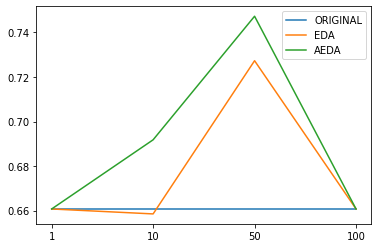

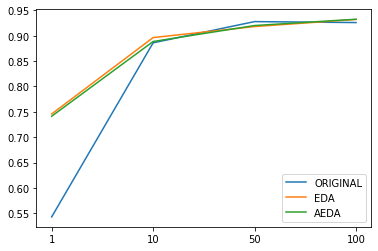

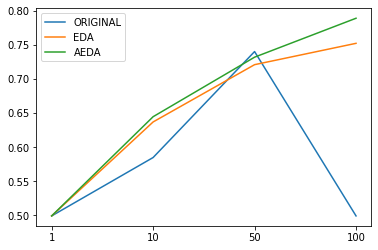

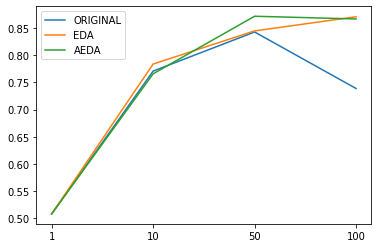

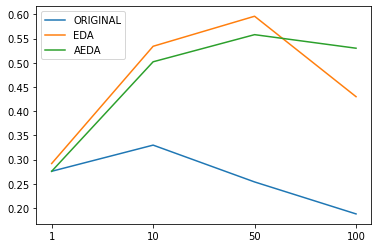

In [ ]:
# importing package
import matplotlib.pyplot as plt
  
# create data
x = ['1','10','50','100']
for dataset in range(5):
  y1,y2,y3 = [],[],[]
  for percentage in x:
    y1.append(res.get(percentage)[dataset])
    y2.append(res.get(percentage)[5+dataset])
    y3.append(res.get(percentage)[10+dataset])
  plt.plot(x, y1, label = "ORIGINAL")
  plt.plot(x, y2, label = "EDA")
  plt.plot(x, y3, label = "AEDA")
  plt.legend()
  plt.show()